### Python 6: Pokemon.json dataset

#### Insights to be drawn  as per statements below:

https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

In [1]:
import pandas as pd
import json, requests
import matplotlib.pyplot as plt
import numpy as np

# USe json viewer to see the structure of data
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

#data = pd.read_json(url)
data = requests.get(url).json()

pokemon_data = []

for pokemon in data['pokemon']:
    pokemon_dict = {
        "ID": pokemon["id"],
        "Number": pokemon["num"],
        "Name": pokemon["name"],
        "Image URL": pokemon["img"],
        "Type": ", ".join(pokemon.get("type", [])),
        "Height": pokemon["height"],
        "Weight": pokemon["weight"],
        "Candy": pokemon.get("candy", ""),
        "Candy Count": pokemon.get("candy_count", ""),
        "Egg": pokemon.get("egg", ""),
        "Spawn Chance": pokemon.get("spawn_chance", ""),
        "Avg Spawns": pokemon.get("avg_spawns", ""),
        "Spawn Time": pokemon.get("spawn_time", ""),  
        "Multipliers": ", ".join(str(multiplier) for multiplier in pokemon.get("multipliers") or []),
        "Weaknesses": ", ".join(pokemon.get("weaknesses", [])),
        "Next Evolution": ", ".join(evolution.get("name", "") for evolution in pokemon.get("next_evolution") or []),
        "Previous Evolution": ", ".join(evolution.get("name", "") for evolution in pokemon.get("prev_evolution") or []),
    }
    
    pokemon_data.append(pokemon_dict)
    
df = pd.DataFrame(pokemon_data)
df = df.replace("", np.nan)
df.head()

,ID,Number,Name,Image URL,Type,Height,Weight,Candy,Candy Count,Egg,Spawn Chance,Avg Spawns,Spawn Time,Multipliers,Weaknesses,Next Evolution,Previous Evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,1.58,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"Fire, Ice, Flying, Psychic",NaN,"Bulbasaur, Ivysaur"
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,1.65,"Water, Ground, Rock","Charmeleon, Charizard",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,1.79,"Water, Ground, Rock",Charizard,Charmander


### Get all Pokemons whose spawn rate is less than 5%

65 pokemons have Spawn rate is less than 5%


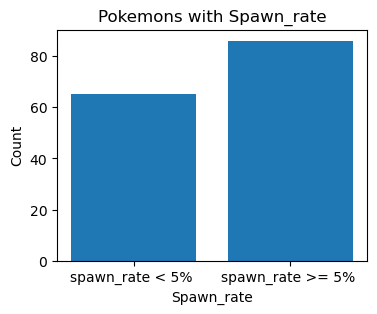

In [2]:
# Get all Pokemons whose spawn rate is less than 5%

spawn_rate_less_than_5_percent = df[df["Spawn Chance"]<.05]

print(f"{spawn_rate_less_than_5_percent.shape[0]} pokemons have Spawn rate is less than 5%")

# Calculate the counts
spawn_rate_less_than_5_percent_count = len(spawn_rate_less_than_5_percent)
spawn_rate_grater_than_5_percent_count = len(df) - spawn_rate_less_than_5_percent_count

# Create a bar chart
labels = ['spawn_rate < 5% ', 'spawn_rate >= 5% ']
counts = [spawn_rate_less_than_5_percent_count, spawn_rate_grater_than_5_percent_count]

plt.figure(figsize=(4,3))
plt.bar(labels, counts)
plt.xlabel('Spawn_rate')
plt.ylabel('Count')
plt.title('Pokemons with Spawn_rate')
plt.show()

### Get all Pokemons that have less than 4 weaknesses

132 pokemons have less than 4 weaknesse


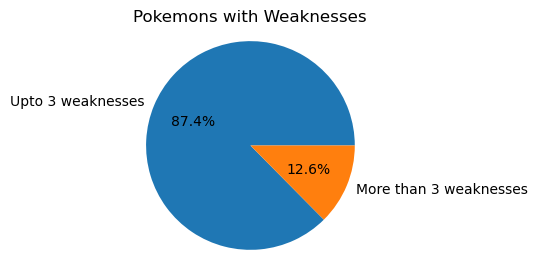

In [3]:
# Get all Pokemons that have less than 4 weaknesses

weaknesses_less_than_4 = df[df['Weaknesses'].str.count(',') < 4]
print(f"{weaknesses_less_than_4.shape[0]} pokemons have less than 4 weaknesse")

labels = ["Upto 3 weaknesses", "More than 3 weaknesses"]
sizes = [len(weaknesses_less_than_4), len(df)-len(weaknesses_less_than_4)]

plt.figure(figsize=(4,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pokemons with Weaknesses')
plt.axis('equal')
plt.show()

### Get all Pokemons that have no multipliers at all

81 pokemons don't have any multiplier


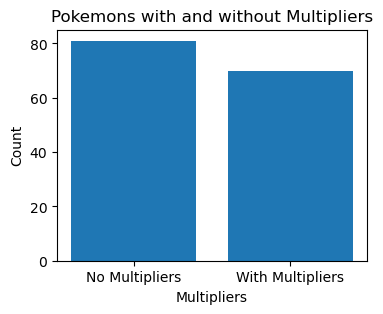

In [4]:
# Get all Pokemons that have no multipliers at all

No_multipliers = df[df['Multipliers'].isnull() | (df['Multipliers'] == '')]
print(f"{No_multipliers.shape[0]} pokemons don't have any multiplier")

labels = ['No Multipliers', 'With Multipliers']
counts = [len(No_multipliers), len(df) - len(No_multipliers)]

plt.figure(figsize=(4,3))
plt.bar(labels, counts)
plt.xlabel('Multipliers')
plt.ylabel('Count')
plt.title('Pokemons with and without Multipliers')
plt.show()

### Get all Pokemons that do not have more than 2 evolutions

150 pokemons have maximum 2 evolutions


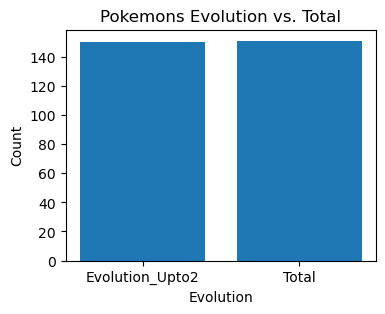

In [5]:
# Filter Pokemons with no more than 2 evolutions

evolution_upto2 = df[(df['Next Evolution'].str.split(',').str.len().fillna(0) + 
                   df['Previous Evolution'].str.split(',').str.len().fillna(0)) <=2 ]


print(f"{evolution_upto2.shape[0]} pokemons have maximum 2 evolutions")

# Create a bar chart
labels = ['Evolution_Upto2', 'Total']
counts = [len(evolution_upto2), len(df)]

plt.figure(figsize=(4,3))
plt.bar(labels, counts)
plt.xlabel('Evolution')
plt.ylabel('Count')
plt.title('Pokemons Evolution vs. Total')
plt.show()

### Get all Pokemons whose spawn time is less than 300 seconds.

81 pokemons have spawn time is less than 300 seconds


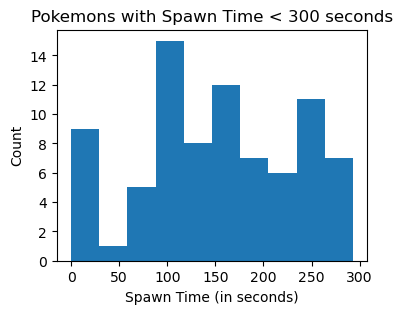

In [6]:
# Get all Pokemons whose spawn time is less than 300 seconds

df['Time_seconds'] = (pd.to_numeric(df['Spawn Time'].str.split(':').str[0], errors='coerce').fillna(0)*60 + 
                        pd.to_numeric(df['Spawn Time'].str.split(':').str[1], errors='coerce').fillna(0))

# Filter Pokemons with spawn time less than 300 seconds
filtered_pokemons = df[df['Time_seconds'] < 300]

print(f"{filtered_pokemons.shape[0]} pokemons have spawn time is less than 300 seconds")

# histogram to visualize the distribution of spawn time
plt.figure(figsize=(4,3))
plt.hist(filtered_pokemons['Time_seconds'], bins=10)
plt.xlabel('Spawn Time (in seconds)')
plt.ylabel('Count')
plt.title('Pokemons with Spawn Time < 300 seconds')
plt.show()

### Get all Pokemon who have more than two types of capabilities

62 pokemons have more than two types of capabilities


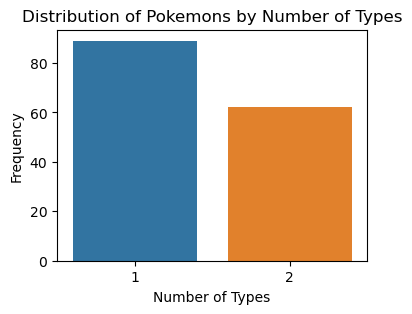

In [7]:
# Get all Pokemon who have more than two types of capabilities

df['Type Count'] = df['Type'].str.split(",").str.len()
                      
# Filter Pokemons with more than two types
filtered_pokemons = df[df['Type Count'] >= 2]
print(f"{filtered_pokemons.shape[0]} pokemons have more than two types of capabilities")

import seaborn as sns
plt.figure(figsize=(4,3))

# Create the distribution plot
sns.countplot(data=df, x='Type Count')
plt.xlabel('Number of Types')
plt.ylabel('Frequency')
plt.title('Distribution of Pokemons by Number of Types')

# Display the plot
plt.show()